<a href="https://colab.research.google.com/github/Nathtaba/Case_Consumidores_ML/blob/main/Consumidores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer

In [3]:
df_consu = pd.read_csv("mall.csv", sep=',')

In [4]:
df_consu.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Verificar se existe valores nulos
df_consu.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df_consu.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_consu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df_consu.hist(figsize=(12,12))

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_consu[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method = 'pearson'), annot=True, fmt=".1f");

In [11]:
#Analisando a proporção entre gêneros:
df_consu['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
sns.pairplot(df_consu, hue="Gender")
plt.show()

In [16]:
scaler = StandardScaler()
scaler.fit(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

StandardScaler()

In [17]:
dados_Escalonados = scaler.transform(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

KMeans

In [43]:
#Executando o algoritmo sem feature scaling
# Definindo o modelo de clusterizacao. K-MEANS com 7 clusters
kmeans = KMeans(n_clusters=7,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_labels

In [44]:
#Executando com feature scaling
# Definindo o modelo de clusterizacao. K-MEANS com 7 clusters
kmeans_escalonados = KMeans(n_clusters=7,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados_Escalonados)

#Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans.predict(dados_Escalonados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_labels_escalonado

In [45]:
dados_Escalonados = pd.DataFrame(dados_Escalonados, columns = ['Annual Income (k$)','Spending Score (1-100)'])

In [ ]:
dados_Escalonados['Grupos'] = kmeans_labels_escalonado
dados_Escalonados.head()

In [ ]:
df_consu['Grupos'] = kmeans_labels
df_consu.head()

In [ ]:
pd.Series(kmeans_labels).value_counts()

In [ ]:
centroides #espaço tridimensional (salário e score de gasto)

In [ ]:
centroides_escalonados

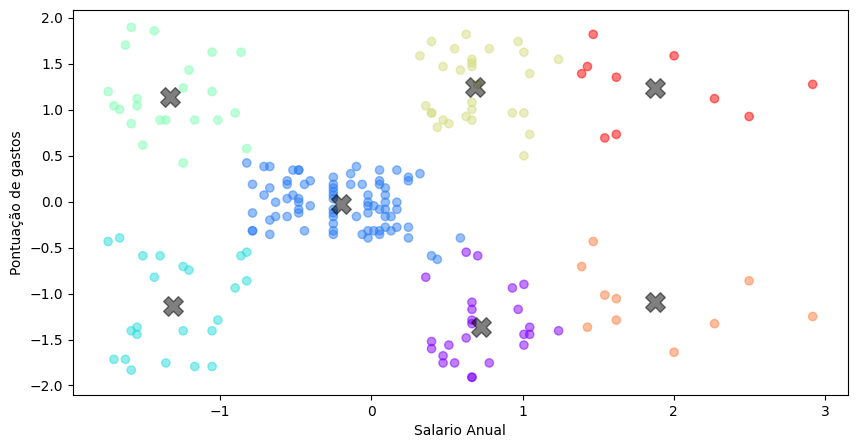

In [51]:
#Clusters com feature scaling
# plotando os dados identificando com os seus clusters
plt.scatter(dados_Escalonados[['Annual Income (k$)']],dados_Escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonado, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

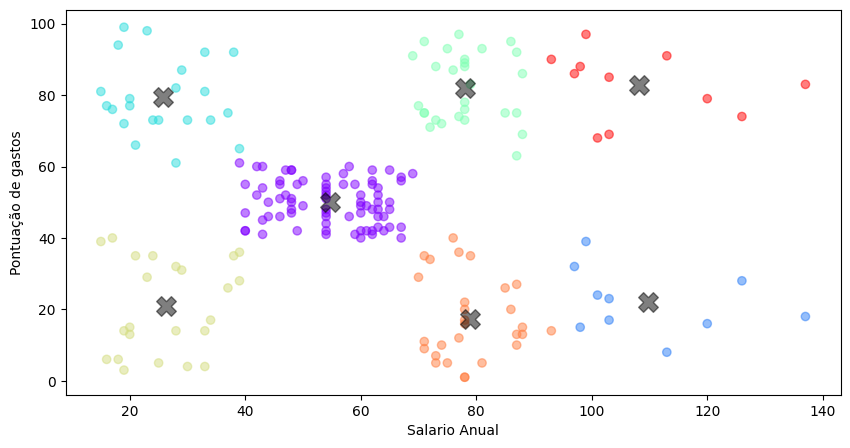

In [52]:
#Clusters sem feature scaling

# plotando os dados identificando com os seus clusters
plt.scatter(df_consu[['Annual Income (k$)']],df_consu[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

Escolhendo a quantidade de grupos usando o método do "cotovelo":

In [55]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 15))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

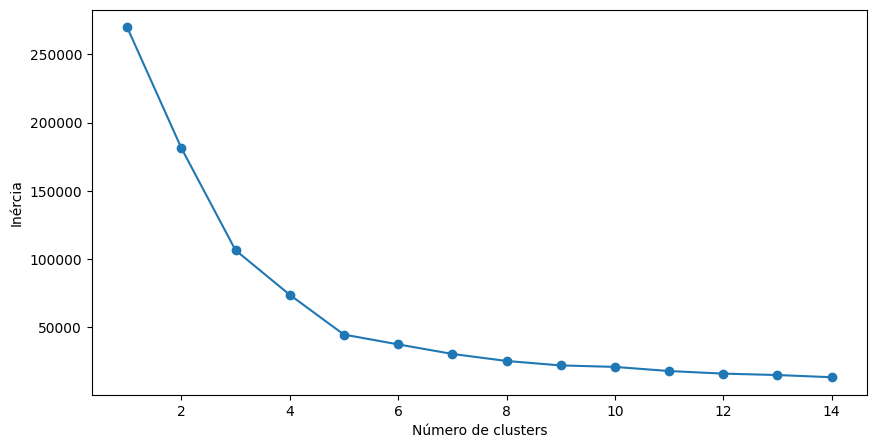

In [56]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
error = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_consu[['Annual Income (k$)','Spending Score (1-100)']])
    error.append(kmeans.inertia_) #calculo do erro do k-mens (mudar o centroide dos dados)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, error, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

In [ ]:
df_consu.groupby('Grupos')['Age'].mean()

In [ ]:
df_consu.groupby('Grupos')['Annual Income (k$)'].mean()

In [62]:
# Definindo o modelo de clusterizacao. K-MEANS com 8 clusters
kmeans = KMeans(n_clusters=8,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


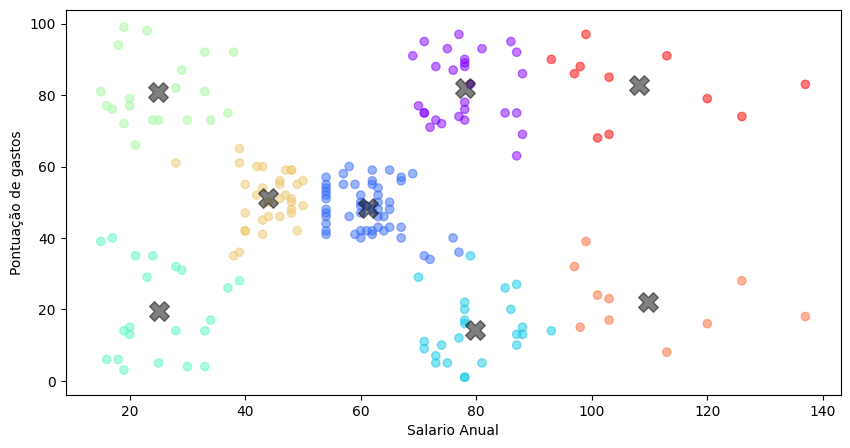

In [63]:
# plotando os dados identificando com os seus clusters
plt.scatter(df_consu[['Annual Income (k$)']],df_consu[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [78]:
dados_grupo_0 = df_consu[df_consu['Grupos'] == 0]
dados_grupo_0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


In [ ]:
dados_grupo_1 = df_consu[df_consu['Grupos'] == 1]
dados_grupo_1

In [ ]:
dados_grupo_2 = df_consu[df_consu['Grupos'] == 2]
dados_grupo_2

In [ ]:
dados_grupo_3 = df_consu[df_consu['Grupos'] == 3]
dados_grupo_3

In [ ]:
dados_grupo_4 = df_consu[df_consu['Grupos'] == 4]
dados_grupo_4

In [ ]:
dados_grupo_5 = df_consu[df_consu['Grupos'] == 5]
dados_grupo_5

In [ ]:
dados_grupo_6 = df_consu[df_consu['Grupos'] == 6]
dados_grupo_6

DBSCAN

In [79]:
#Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
#Ajustando aos dados
dbscan.fit(df_consu[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [95]:
#Quantidade de outliers
list (dbscan_labels).count(-1)

38

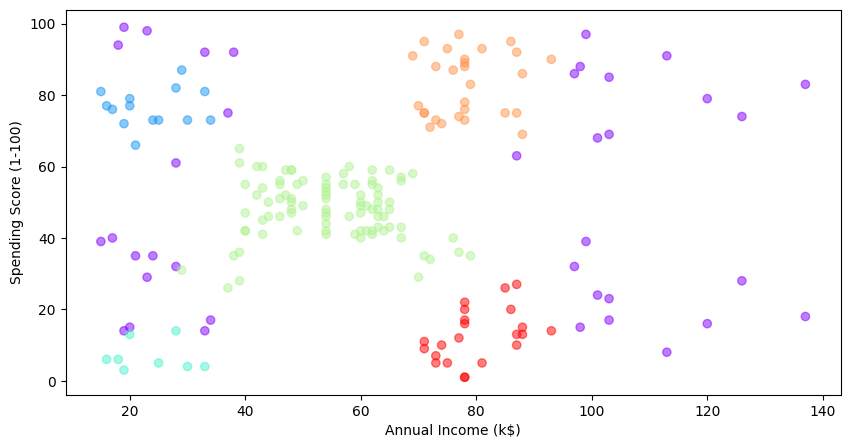

In [81]:
#Plotando o grafico:
plt.scatter(df_consu[['Annual Income (k$)']],df_consu[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

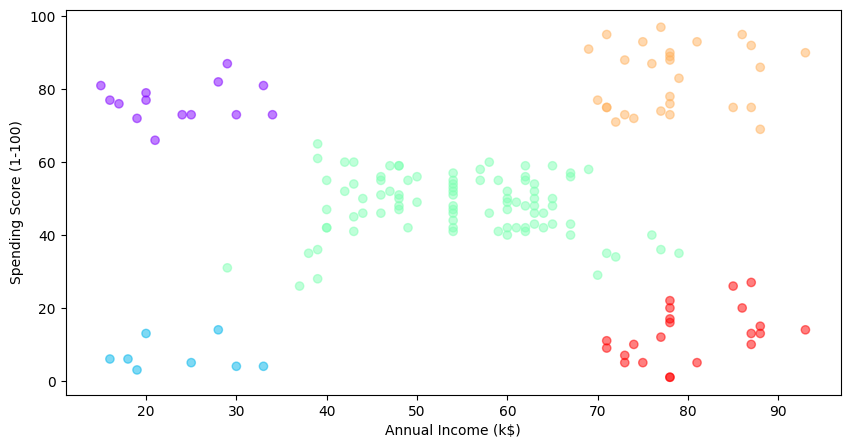

In [83]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(df_consu[['Annual Income (k$)']][mascara],df_consu[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Tipo Externo:

(a) Usando o Adjusted Rand Index

Compara o desempenho quando forem fornecidos datasets com labels geradas de forma aleatória. Quando essas labels estão muito diferente, o valor se aproxima de 0, o que sugere um resultado negativo, ou seja, clusters não próximos.

Comparação entre K-Means e DBSCAN:

In [84]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.5548212516332592

Tipo interno:

(b) Avaliando a métrica de Silhouette

Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)

Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

In [86]:
#KMeans
silhouette_score(df_consu[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

0.45704384633565154

In [87]:
#DBSCAN
silhouette_score(df_consu[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

0.36328873885121793